In [59]:
# 根据抽样出来的200个点plot 轮廓
# posterior probability of one classes 的轮廓

In [60]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
def gauss2D(x, m, C):
    Ci = np.linalg.inv(C)
    dc = np.linalg.det(Ci)
    num = np.exp(-0.5 * (x - m).T @ (Ci @ (x - m)))
    den = 2 * np.pi * dc
    return num / den  # this is the probability

In [62]:
def twoD(nx, ny, m, C):
    x = np.linspace(-7, 7, nx)
    y = np.linspace(-7, 7, ny)
    X, Y = np.meshgrid(x, y, indexing = 'ij')
    
    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j], Y[i,j]])
            Z[i, j] = gauss2D(xvec, m, C)
    return X, Y, Z

In [63]:
def posteriorPlot(nx, ny, m1, C1, m2, C2, P1, P2):
    x = np.linspace(-7, 7, nx)
    y = np.linspace(-7, 7, ny)
    X, Y = np.meshgrid(x, y, indexing = 'ij')
    
    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j], Y[i,j]])
            num = P1*gauss2D(xvec, m1, C1)
            den = P1*gauss2D(xvec, m1, C1) + P2*gauss2D(xvec, m2, C2)
            Z[i, j] = num / den
    return X, Y, Z

In [93]:
nx, ny = 50, 50

m1 = np.array([0,3])
m2 = np.array([3,2.5])
C1 = np.array([[1,0], [0,1]], np.float32)
C2 = np.array([ [1,0], [0,1]], np.float32)
P1 = 1.5
P2 = 0.5

N = 200
data1 = np.random.randn(N, 2)
data2 = np.random.randn(N, 2)
A1 = np.linalg.cholesky(C1)
A2 = np.linalg.cholesky(C2)
new_data1 = data1 @ A1.T + m1
new_data2 = data2 @ A2.T + m2

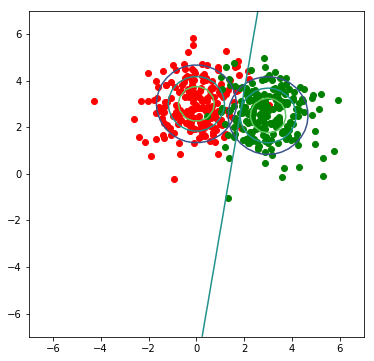

In [94]:
X1, Y1, Z1 = twoD(nx, ny, m1, C1)
X2, Y2, Z2 = twoD(nx, ny, m2, C2)
X3, Y3, Z3 = posteriorPlot(nx, ny, m1, C1, m2, C2, P1, P2)
plt.figure(figsize=(6,6))
plt.scatter(new_data1[:, 0], new_data1[:, 1], c="r")
plt.scatter(new_data2[:, 0], new_data2[:, 1], c="g")
plt.contour(X1, Y1, Z1, 3)
plt.contour(X2, Y2, Z2, 3)
plt.contour(X3, Y3, Z3, 1)

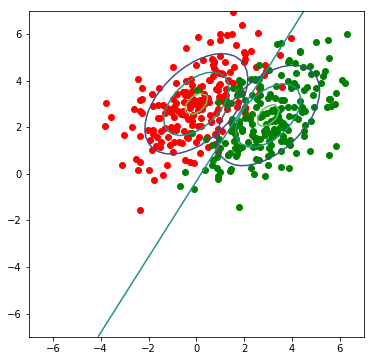

In [89]:
m1 = np.array([0,3])
m2 = np.array([3,2.5])
C1 = np.array([[2,1], [1,2]], np.float32)
C2 = np.array([ [2,1], [1,2] ], np.float32)
P1 = 0.7
P2 = 0.3

N = 200
data1 = np.random.randn(N, 2)
data2 = np.random.randn(N, 2)
A1 = np.linalg.cholesky(C1)
A2 = np.linalg.cholesky(C2)
new_data1 = data1 @ A1.T + m1
new_data2 = data2 @ A2.T + m2

X1, Y1, Z1 = twoD(nx, ny, m1, C1)
X2, Y2, Z2 = twoD(nx, ny, m2, C2)
X3, Y3, Z3 = posteriorPlot(nx, ny, m1, C1, m2, C2, P1, P2)
plt.figure(figsize=(6,6))
plt.scatter(new_data1[:, 0], new_data1[:, 1], c="r")
plt.scatter(new_data2[:, 0], new_data2[:, 1], c="g")
plt.contour(X1, Y1, Z1, 3)
plt.contour(X2, Y2, Z2, 3)
plt.contour(X3, Y3, Z3, 1)

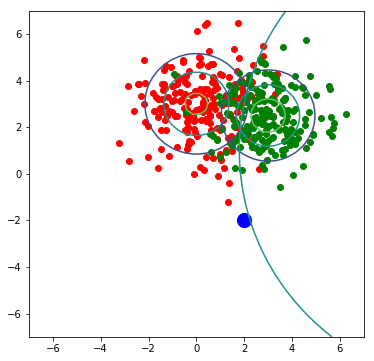

In [98]:
np.random.seed(10)
m1 = np.array([0,3])
m2 = np.array([3,2.5])
C1 = np.array([[2,0], [0,2]], np.float32)
C2 = np.array([ [1.5,0], [0,1.5] ], np.float32)
P1 = 0.5
P2 = 0.5

N = 200
data1 = np.random.randn(N, 2)
data2 = np.random.randn(N, 2)
A1 = np.linalg.cholesky(C1)
A2 = np.linalg.cholesky(C2)
new_data1 = data1 @ A1.T + m1
new_data2 = data2 @ A2.T + m2

X1, Y1, Z1 = twoD(nx, ny, m1, C1)
X2, Y2, Z2 = twoD(nx, ny, m2, C2)
X3, Y3, Z3 = posteriorPlot(nx, ny, m1, C1, m2, C2, P1, P2)
plt.figure(figsize=(6,6))
plt.scatter(new_data1[:, 0], new_data1[:, 1], c="r")
plt.scatter(new_data2[:, 0], new_data2[:, 1], c="g")
plt.scatter(2, -2, c="b", s=200)
plt.contour(X1, Y1, Z1, 3)
plt.contour(X2, Y2, Z2, 3)
plt.contour(X3, Y3, Z3, 1)


# Fisher LDA and ROC Curve

In [68]:
# plot contours
nx = 50
ny = 50
m1 = np.array([0, 3])
C1 = np.array([[2,1], [1, 2]])
m2 = np.array([3, 2.5])
C2 = C1

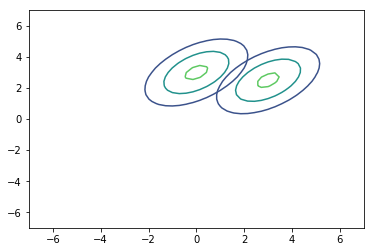

In [69]:
X1, Y1, Z1 = twoD(nx, ny, m1, C1)
X2, Y2, Z2 = twoD(nx, ny, m2, C2)
plt.contour(X1, Y1, Z1, 3)
plt.contour(X2, Y2, Z2, 3)

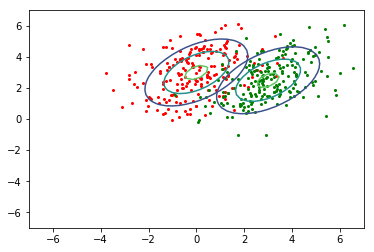

In [70]:
# plot scatter point
N = 200
A = np.linalg.cholesky(C1)
new_data1 = data1.dot( A.T)  + m1
new_data2 =  data2.dot( A.T) + m2

# plot
X1, Y1, Z1 = twoD(nx, ny, m1, C1)
X2, Y2, Z2 = twoD(nx, ny, m2, C2)
plt.contour(X1, Y1, Z1, 3)
plt.contour(X2, Y2, Z2, 3)
plt.scatter(new_data1[:, 0], new_data1[:, 1], c = "r", s=4)
plt.scatter(new_data2[:, 0], new_data2[:, 1], c = "g", s=4)

In [71]:
# plot the line 
wf = np.linalg.inv(C1 * 2) @ (m2 - m1)

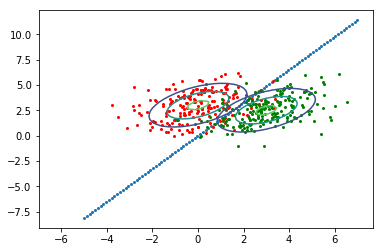

In [72]:
# plot the line
x = np.linspace(-5, 7, 100)
y = x * (-wf[0] / wf[1])

plt.scatter(x, y, s=4)
plt.contour(X1, Y1, Z1, 3)
plt.contour(X2, Y2, Z2, 3)
plt.scatter(new_data1[:, 0], new_data1[:, 1], c = "r", s=4)
plt.scatter(new_data2[:, 0], new_data2[:, 1], c = "g", s=4)

(array([ 1.,  0.,  0.,  0.,  3.,  1.,  1.,  4.,  1.,  4.,  6.,  8.,  9.,
         6.,  4., 16., 14., 19.,  8., 17.,  7., 12., 15.,  9.,  8.,  3.,
         4.,  3.,  5.,  2.,  3.,  1.,  0.,  2.,  0.,  1.,  1.,  1.,  0.,
         1.]),
 array([-2.02016041, -1.8265198 , -1.6328792 , -1.43923859, -1.24559798,
        -1.05195737, -0.85831677, -0.66467616, -0.47103555, -0.27739495,
        -0.08375434,  0.10988627,  0.30352688,  0.49716748,  0.69080809,
         0.8844487 ,  1.0780893 ,  1.27172991,  1.46537052,  1.65901112,
         1.85265173,  2.04629234,  2.23993295,  2.43357355,  2.62721416,
         2.82085477,  3.01449537,  3.20813598,  3.40177659,  3.5954172 ,
         3.7890578 ,  3.98269841,  4.17633902,  4.36997962,  4.56362023,
         4.75726084,  4.95090144,  5.14454205,  5.33818266,  5.53182327,
         5.72546387]),
 <a list of 40 Patch objects>)

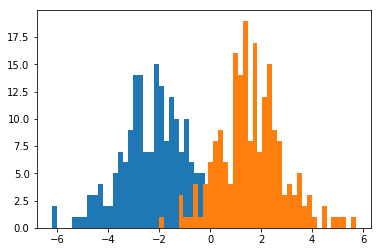

In [73]:
yp1 = new_data1 @ wf
yp2 = new_data2 @ wf
plt.hist(yp1, bins=40)
plt.hist(yp2, bins=40)

In [74]:
# ROC curve
pmin = min(np.min(yp1), np.min(yp2))
pmax = max(np.max(yp1), np.max(yp2))

In [75]:
n = 50
thrange = np.linspace(pmin, pmax, n)
roc = np.zeros( (n, 2) )

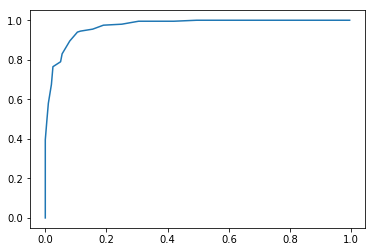

In [76]:
for i in range(n):
    thresh = thrange[i]
    TP = sum(yp2 > thresh) / len(yp2)
    FP = sum(yp1 > thresh) / len(yp1)
    roc[i, :] = [TP, FP]
plt.plot(roc[:, 1], roc[:, 0])

In [77]:
# cal AUC
print(abs(np.trapz(roc[:, 0], roc[:, 1])))

0.9661500000000001


In [78]:
# cal accuary by random thresh
set_thresh = 0
(sum(yp1 < 0) + sum(yp2 > 0)) / (yp1.shape[0] + yp2.shape[0])

0.915

In [79]:
# use random direction
wf = [1, 1]

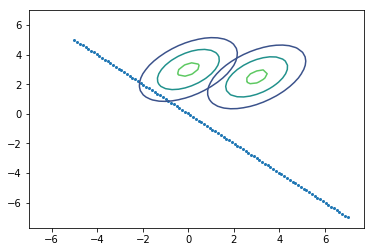

In [80]:
x = np.linspace(-5, 7, 100)
y = x * (-wf[0] / wf[1])

plt.scatter(x, y, s=4)
plt.contour(X1, Y1, Z1, 3)
plt.contour(X2, Y2, Z2, 3)

(array([ 2.,  0.,  2.,  1.,  2.,  2.,  5.,  2.,  6.,  7.,  6.,  6.,  5.,
         8., 11.,  8., 10., 13., 17., 11.,  7.,  9.,  7.,  9.,  7.,  7.,
         2.,  7.,  2.,  8.,  3.,  2.,  1.,  0.,  2.,  1.,  1.,  0.,  0.,
         1.]),
 array([-0.10511987,  0.20380473,  0.51272933,  0.82165393,  1.13057853,
         1.43950312,  1.74842772,  2.05735232,  2.36627692,  2.67520152,
         2.98412611,  3.29305071,  3.60197531,  3.91089991,  4.21982451,
         4.5287491 ,  4.8376737 ,  5.1465983 ,  5.4555229 ,  5.7644475 ,
         6.07337209,  6.38229669,  6.69122129,  7.00014589,  7.30907049,
         7.61799508,  7.92691968,  8.23584428,  8.54476888,  8.85369348,
         9.16261807,  9.47154267,  9.78046727, 10.08939187, 10.39831647,
        10.70724106, 11.01616566, 11.32509026, 11.63401486, 11.94293946,
        12.25186405]),
 <a list of 40 Patch objects>)

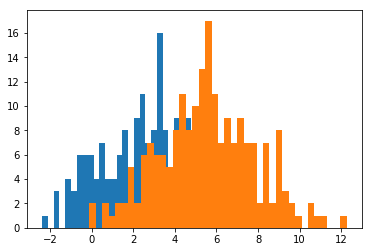

In [81]:
yp1 = new_data1 @ wf
yp2 = new_data2 @ wf
plt.hist(yp1, bins=40)
plt.hist(yp2, bins=40)

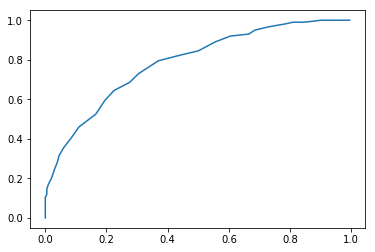

In [82]:
pmin = min(np.min(yp1), np.min(yp2))
pmax = max(np.max(yp1), np.max(yp2))
n = 50
thrange = np.linspace(pmin, pmax, n)
roc = np.zeros( (n, 2) )
for i in range(n):
    thresh = thrange[i]
    TP = sum(yp2 > thresh) / len(yp2)
    FP = sum(yp1 > thresh) / len(yp1)
    roc[i, :] = [TP, FP]
plt.plot(roc[:, 1], roc[:, 0])

In [83]:
print(abs(np.trapz(roc[:, 0], roc[:, 1])))

0.7810875


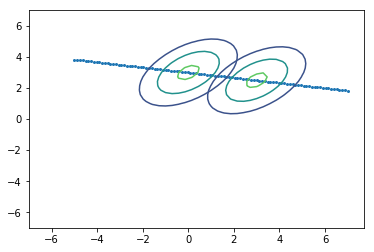

In [84]:
# connected with two mean points
x = np.linspace(-5, 7, 100)
k = (m1[1] - m2[1]) / (m1[0] - m2[0])
b = m1[1] - m1[0]*k
wf = np.array([-k, 1])
y = x * (-wf[0] / wf[1]) + b

plt.scatter(x, y, s=4)
plt.contour(X1, Y1, Z1, 3)
plt.contour(X2, Y2, Z2, 3)

(array([ 2.,  0.,  1.,  1.,  0.,  2.,  1.,  1.,  4., 11.,  6.,  9.,  3.,
        11., 10.,  9., 10., 11., 13.,  5.,  9., 12., 11., 10.,  7.,  3.,
         4.,  5.,  5.,  7.,  5.,  3.,  2.,  1.,  2.,  1.,  0.,  1.,  1.,
         1.]),
 array([ 2.27913449,  2.47449026,  2.66984603,  2.86520181,  3.06055758,
         3.25591335,  3.45126912,  3.6466249 ,  3.84198067,  4.03733644,
         4.23269221,  4.42804798,  4.62340376,  4.81875953,  5.0141153 ,
         5.20947107,  5.40482685,  5.60018262,  5.79553839,  5.99089416,
         6.18624993,  6.38160571,  6.57696148,  6.77231725,  6.96767302,
         7.1630288 ,  7.35838457,  7.55374034,  7.74909611,  7.94445188,
         8.13980766,  8.33516343,  8.5305192 ,  8.72587497,  8.92123075,
         9.11658652,  9.31194229,  9.50729806,  9.70265383,  9.89800961,
        10.09336538]),
 <a list of 40 Patch objects>)

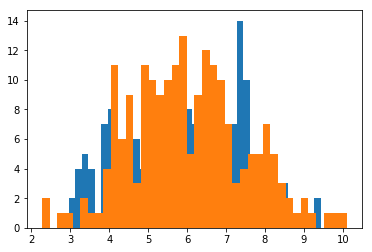

In [85]:
yp1 = new_data1 @ wf + b
yp2 = new_data2 @ wf + b
plt.hist(yp1, bins=40)
plt.hist(yp2, bins=40)

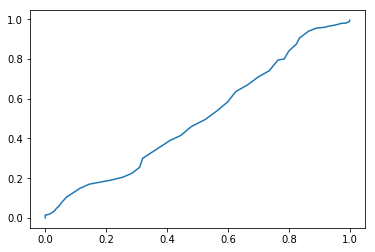

In [86]:
pmin = min(np.min(yp1), np.min(yp2))
pmax = max(np.max(yp1), np.max(yp2))
n = 50
thrange = np.linspace(pmin, pmax, n)
roc = np.zeros( (n, 2) )
for i in range(n):
    thresh = thrange[i]
    TP = sum(yp2 > thresh) / len(yp2)
    FP = sum(yp1 > thresh) / len(yp1)
    roc[i, :] = [TP, FP]
plt.plot(roc[:, 1], roc[:, 0])

In [87]:
print(abs(np.trapz(roc[:, 0], roc[:, 1])))

0.50255


# Mahalanobis Distance